# DATA ANALYTICS CAPSTONE PROJECT

## Integrating Multi-Source Data and Image Identification for Automated Crop Disease Diagnosis using Deep Learning
### Objectives
* Develop a deep learning model using multi-source data for accurate and efficient crop disease diagnosis. 
* Investigate the effectiveness of different NoSQL databases for storing agricultural data. 
* Explore different deep-learning paradigms to enhance the performance of crop disease diagnosis models.

### ABOUT DATA
Data used is on Mango crop diseases ("Anthracnose disease", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould")

## (A.) RELEVANT LIBRARIES FOR DATA LOADING AND EXPLORATION

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import cv2

## (B.) LOADING IMAGE DATA FROM DATA DIRECTORY

In [2]:
data_dir = r"C:\Users\HP\Desktop\DATA ANALYTICS CAPSTONE PROJECT\DATA-ANALYTICS-CAPSTONE-PROJECT\MangoLeafBD Dataset"
subfolder_names = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy",
                  "Powdery Mildew", "Sooty Mould"]

image_data = []

for subfolder_name in subfolder_names:
    folder_path = os.path.join(data_dir, subfolder_name)
    image_names = os.listdir(folder_path)
    image_count = len(image_names)
    image_info = {"Category": subfolder_name, "Image Count": image_count, "Dimensions": []}
    
    
    random.seed(42)  
    selected_images = random.sample(image_names, 5)
    
    
    for i, image_name in enumerate(selected_images, 1):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        height, width, channels = image.shape
        image_info["Dimensions"].append((height, width, channels))
        print(f"Image {i}: Height={height}, Width={width}, Channels={channels}")
    
    
    image_data.append(image_info)
    print()
df_image_info = pd.DataFrame(image_data)

display(df_image_info)

Image 1: Height=320, Width=240, Channels=3
Image 2: Height=240, Width=240, Channels=3
Image 3: Height=320, Width=240, Channels=3
Image 4: Height=240, Width=320, Channels=3
Image 5: Height=240, Width=240, Channels=3

Image 1: Height=320, Width=240, Channels=3
Image 2: Height=320, Width=240, Channels=3
Image 3: Height=240, Width=320, Channels=3
Image 4: Height=320, Width=240, Channels=3
Image 5: Height=240, Width=320, Channels=3

Image 1: Height=240, Width=240, Channels=3
Image 2: Height=240, Width=240, Channels=3
Image 3: Height=240, Width=240, Channels=3
Image 4: Height=240, Width=240, Channels=3
Image 5: Height=240, Width=240, Channels=3

Image 1: Height=240, Width=240, Channels=3
Image 2: Height=240, Width=240, Channels=3
Image 3: Height=240, Width=240, Channels=3
Image 4: Height=240, Width=240, Channels=3
Image 5: Height=240, Width=240, Channels=3

Image 1: Height=240, Width=320, Channels=3
Image 2: Height=320, Width=240, Channels=3
Image 3: Height=240, Width=320, Channels=3
Image 4

,Category,Image Count,Dimensions
0,Anthracnose,500,"[(320, 240, 3), (240, 240, 3), (320, 240, 3), ..."
1,Bacterial Canker,500,"[(320, 240, 3), (320, 240, 3), (240, 320, 3), ..."
2,Cutting Weevil,500,"[(240, 240, 3), (240, 240, 3), (240, 240, 3), ..."
3,Die Back,500,"[(240, 240, 3), (240, 240, 3), (240, 240, 3), ..."
4,Gall Midge,500,"[(240, 320, 3), (320, 240, 3), (240, 320, 3), ..."
5,Healthy,500,"[(240, 320, 3), (240, 320, 3), (240, 320, 3), ..."
6,Powdery Mildew,500,"[(320, 240, 3), (240, 240, 3), (240, 240, 3), ..."
7,Sooty Mould,500,"[(320, 240, 3), (240, 320, 3), (320, 240, 3), ..."


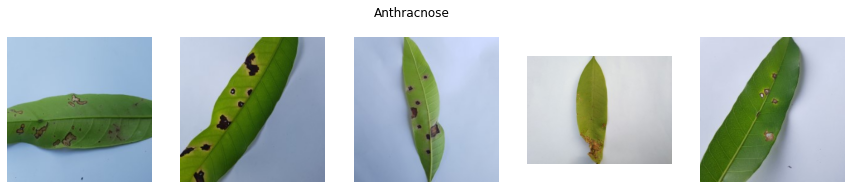

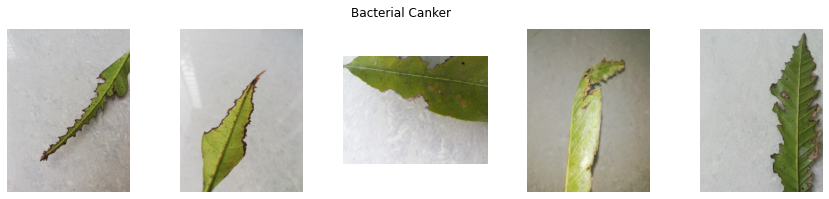

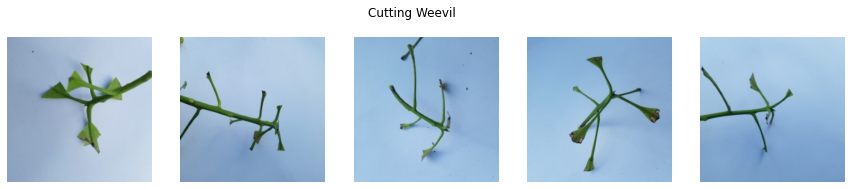

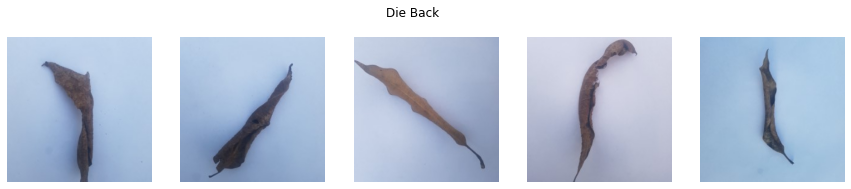

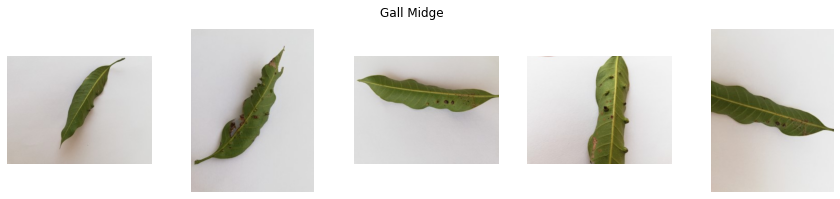

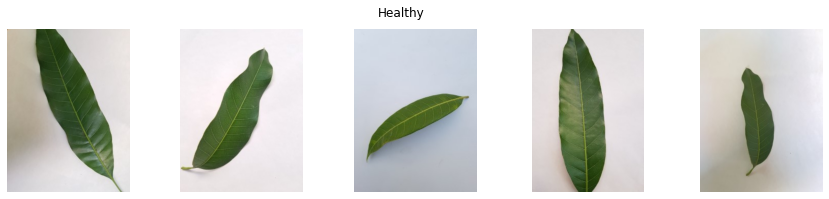

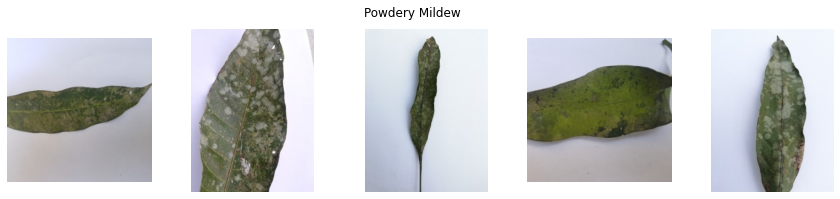

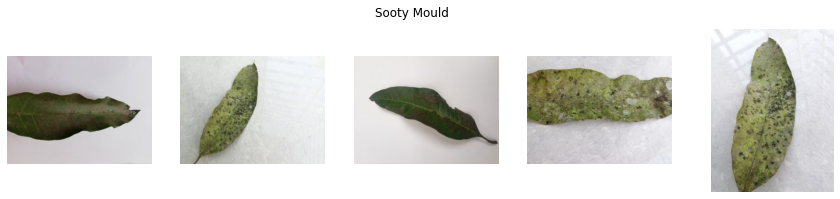

In [3]:

def display_random_images(folder_path, subfolder_name):
    plt.figure(figsize=(15, 3))
    plt.suptitle(subfolder_name)
    for i in range(5):
        
        image_name = random.choice(os.listdir(folder_path))
        image_path = os.path.join(folder_path, image_name)

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.axis('off')
    
    plt.show()

for subfolder_name in subfolder_names:
    folder_path = os.path.join(data_dir, subfolder_name)
    display_random_images(folder_path, subfolder_name)

## (C.) PREPROCESSING STAGE

In [4]:
# shape of the DataFrame
print("DataFrame Shape:", df_image_info.shape)


DataFrame Shape: (8, 3)


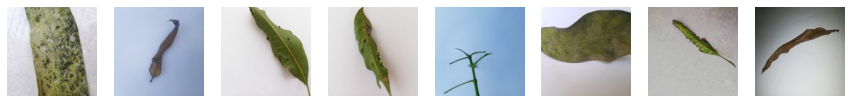

In [5]:
 image_size = (224, 224)
num_classes = 8  

category_to_label = {
    "Anthracnose": 0,
    "Bacterial Canker": 1,
    "Cutting Weevil": 2,
    "Die Back": 3,
    "Gall Midge": 4,
    "Healthy": 5,
    "Powdery Mildew": 6,
    "Sooty Mould": 7
}

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize(image_size)
    image = np.array(image)
    return image

images = []
labels = []

for _, row in df_image_info.iterrows():
    category = row["Category"]
    label = category_to_label[category]
    images_in_category = os.listdir(os.path.join(data_dir, category))
    for image_name in images_in_category:
        image_path = os.path.join(data_dir, category, image_name)
        preprocessed_image = preprocess_image(image_path)
        images.append(preprocessed_image)
        labels.append(label)

images_array = np.array(images)
labels_array = np.array(labels)
num_random_images_to_display = 8
random_indices = np.random.choice(len(images_array), num_random_images_to_display, replace=False)
random_images = images_array[random_indices]

def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

display_images(random_images)


In [6]:
# Confirming the size of the preprocessed images
prepro_image_sizes = [image.shape[:2] for image in random_images]
print("Preprocessed Image Sizes:", prepro_image_sizes)


Preprocessed Image Sizes: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224)]


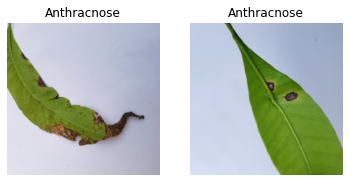

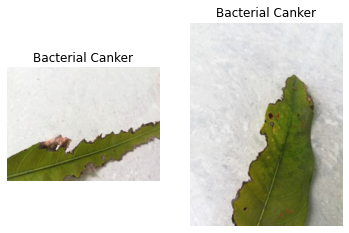

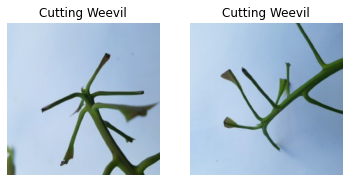

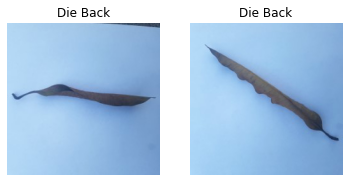

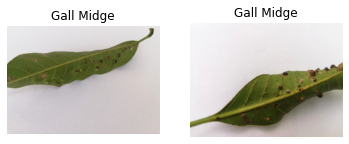

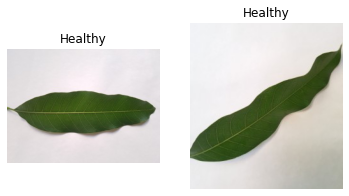

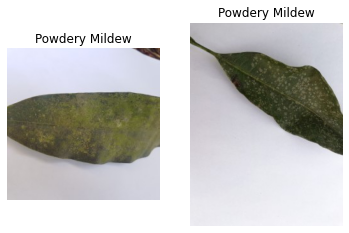

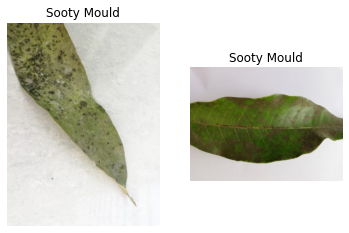

Image 1 (Anthracnose) - Pixel Range: (0, 255)
Image 2 (Anthracnose) - Pixel Range: (0, 255)
Image 3 (Bacterial Canker) - Pixel Range: (0, 255)
Image 4 (Bacterial Canker) - Pixel Range: (0, 255)
Image 5 (Cutting Weevil) - Pixel Range: (0, 255)
Image 6 (Cutting Weevil) - Pixel Range: (0, 255)
Image 7 (Die Back) - Pixel Range: (35, 255)
Image 8 (Die Back) - Pixel Range: (11, 255)
Image 9 (Gall Midge) - Pixel Range: (0, 255)
Image 10 (Gall Midge) - Pixel Range: (0, 255)
Image 11 (Healthy) - Pixel Range: (0, 255)
Image 12 (Healthy) - Pixel Range: (4, 255)
Image 13 (Powdery Mildew) - Pixel Range: (15, 255)
Image 14 (Powdery Mildew) - Pixel Range: (3, 255)
Image 15 (Sooty Mould) - Pixel Range: (0, 255)
Image 16 (Sooty Mould) - Pixel Range: (0, 255)


In [7]:
# Rescaling pixel values to [0, 255]
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)    
    image = (image / image.max() * 255).astype(np.uint8)
    return image

df_image_info["preprocessed_image"] = df_image_info["Category"].apply(lambda category: [preprocess_image(os.path.join(data_dir, category, image_name)) 
                                                                                        for image_name in os.listdir(os.path.join(data_dir, category))])

num_random_images_per_class = 2
random_images = []

for _, row in df_image_info.iterrows():
    preprocessed_images = row["preprocessed_image"]
    selected_images = random.sample(preprocessed_images, num_random_images_per_class)
    category_name = row["Category"]
    random_images.extend([(image, category_name) for image in selected_images])

def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(6, 6))
    for i, (image, category) in enumerate(images):
        axes[i].imshow(image)
        axes[i].set_title(category, fontsize=12)
        axes[i].axis('off')
    plt.show()

for i in range(0, len(random_images), num_random_images_per_class):
    display_images(random_images[i:i+num_random_images_per_class])

def check_pixel_range(images):
    for i, (image, category) in enumerate(images, 1):
        print(f"Image {i} ({category}) - Pixel Range: ({np.min(image)}, {np.max(image)})")

check_pixel_range(random_images)

## (D.) DATA SPLIT

In [8]:
X = df_image_info['preprocessed_image']
X_array = np.array(X)

print("Shape of X_array:", X_array.shape)
print("Data type of X_array:", type(X_array))



Shape of X_array: (8,)
Data type of X_array: <class 'numpy.ndarray'>


In [9]:
X = df_image_info['preprocessed_image']
X_flat = [image for image_list in X for image in image_list]
X_array = np.array(X_flat)

print("Shape of X_array:", X_array.shape)
print("Data type of X_array:", type(X_array))


Shape of X_array: (4000,)
Data type of X_array: <class 'numpy.ndarray'>


C:\Users\HP\AppData\Local\Temp\ipykernel_38600\1718951865.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_array = np.array(X_flat)


In [10]:
df_image_info["label"] = df_image_info["Category"].map(category_to_label)

y = []

for _, row in df_image_info.iterrows():
    category_label = row["label"]
    num_images = len(row["preprocessed_image"])
    y.extend([category_label] * num_images)

y_array = np.array(y)

print("Shape of y_array:", y_array.shape)
print("Data type of y_array:", type(y_array))


Shape of y_array: (4000,)
Data type of y_array: <class 'numpy.ndarray'>


In [ ]:
target_size = (128, 128)

X_normalized = []

for image_list in X_array:
    normalized_images = [np.array(Image.fromarray(image_array).resize(target_size)) / 255.0 for image_array in image_list]
    X_normalized.extend(normalized_images)

X_normalized = np.array(X_normalized)

print("Data type of X_normalized:", X_normalized.dtype)
print("Shape of X_normalized:", X_normalized.shape)
print("Sample from X_normalized:")
print(X_normalized[0])


In [ ]:
X = df_image_info['preprocessed_image']
y = df_image_info['Category']

target_size = (224, 224)

X_normalized = [np.array(Image.fromarray(image_array).resize(target_size)) / 255.0 for image_list in X for image_array in image_list]
X_normalized = np.array(X_normalized)


print("Data type of X_normalized:", X_normalized.dtype)
print("Shape of X_normalized:", X_normalized.shape)
print("Sample from X_normalized:")
print(X_normalized[0])


## (E.) MODEL BUILDING
### Loading Relevant Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV